<a href="https://colab.research.google.com/github/NataliiaPyrih/CodSoft/blob/main/IrisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(147, 5)

In [ ]:
df.duplicated().sum()

0

##Data Visualisation

([<matplotlib.patches.Wedge at 0x79fa6737e8f0>,
 [Text(0.5295169895422337, 0.964163760875781, 'Iris-setosa'),
  Text(-1.0989953336498821, -0.04700272987587277, 'Iris-versicolor'),
  Text(0.5702318449125436, -0.9406570273206047, 'Iris-virginica')],
 [Text(0.2888274488412183, 0.5259075059322441, '34%'),
  Text(-0.599452000172663, -0.025637852659566963, '33%'),
  Text(0.3110355517704783, -0.5130856512657843, '33%')])

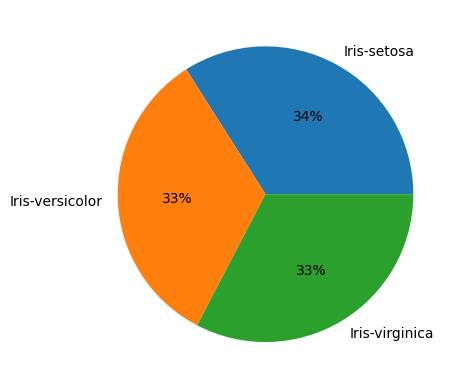

In [ ]:
plt.pie(df['species'].value_counts(), labels=df['species'].unique(),autopct='%.0f%%')

<Axes: xlabel='species', ylabel='petal_width'>

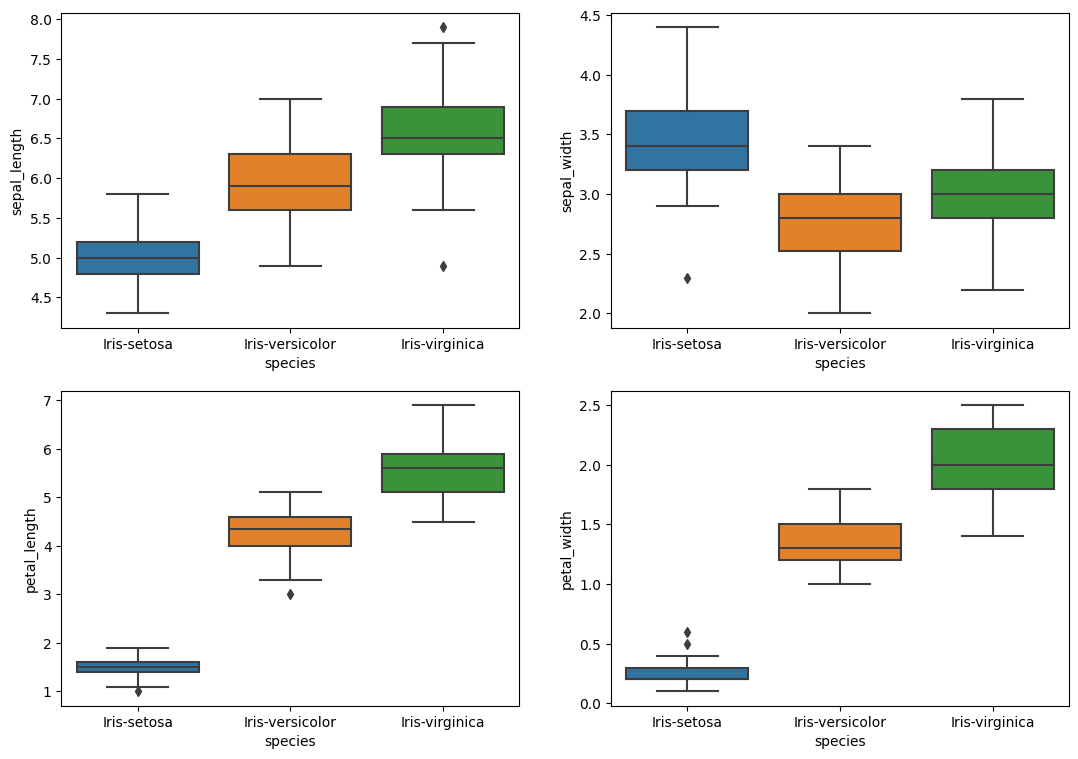

In [ ]:
fig, axes=plt.subplots(2,2, figsize=(13,9))
sns.boxplot(data=df, x='species', y='sepal_length', ax=axes[0,0])
sns.boxplot(data=df, x='species', y='sepal_width', ax=axes[0,1])
sns.boxplot(data=df, x='species', y='petal_length', ax=axes[1,0])
sns.boxplot(data=df, x='species', y='petal_width', ax=axes[1,1])

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

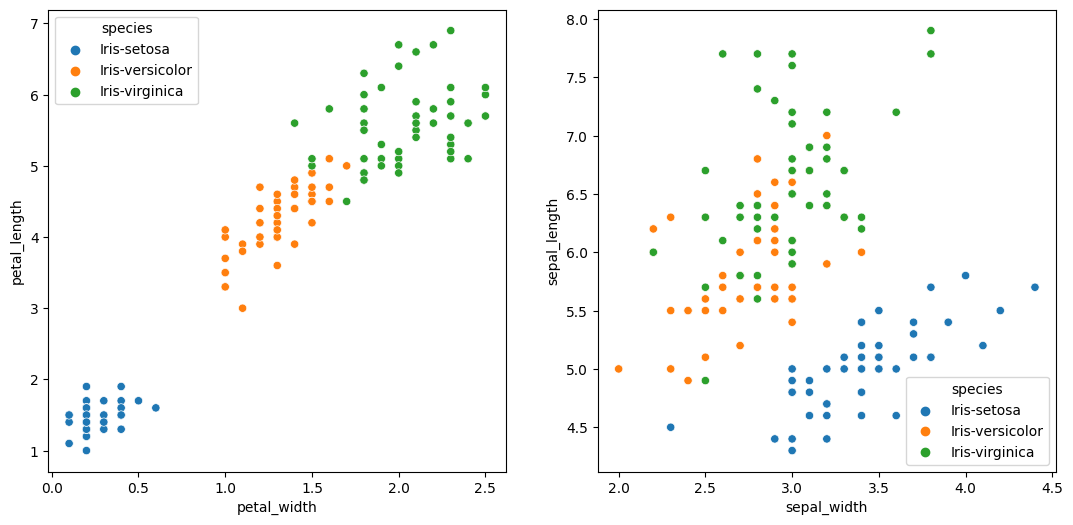

In [ ]:
fig, axes=plt.subplots(1,2, figsize=(13, 6))
sns.scatterplot(data=df, x='petal_width', y='petal_length', hue='species', ax=axes[0])
sns.scatterplot(data=df, x='sepal_width', y='sepal_length', hue='species', ax=axes[1])

[Text(0.5, 1.0, 'Distribution of petal length')]

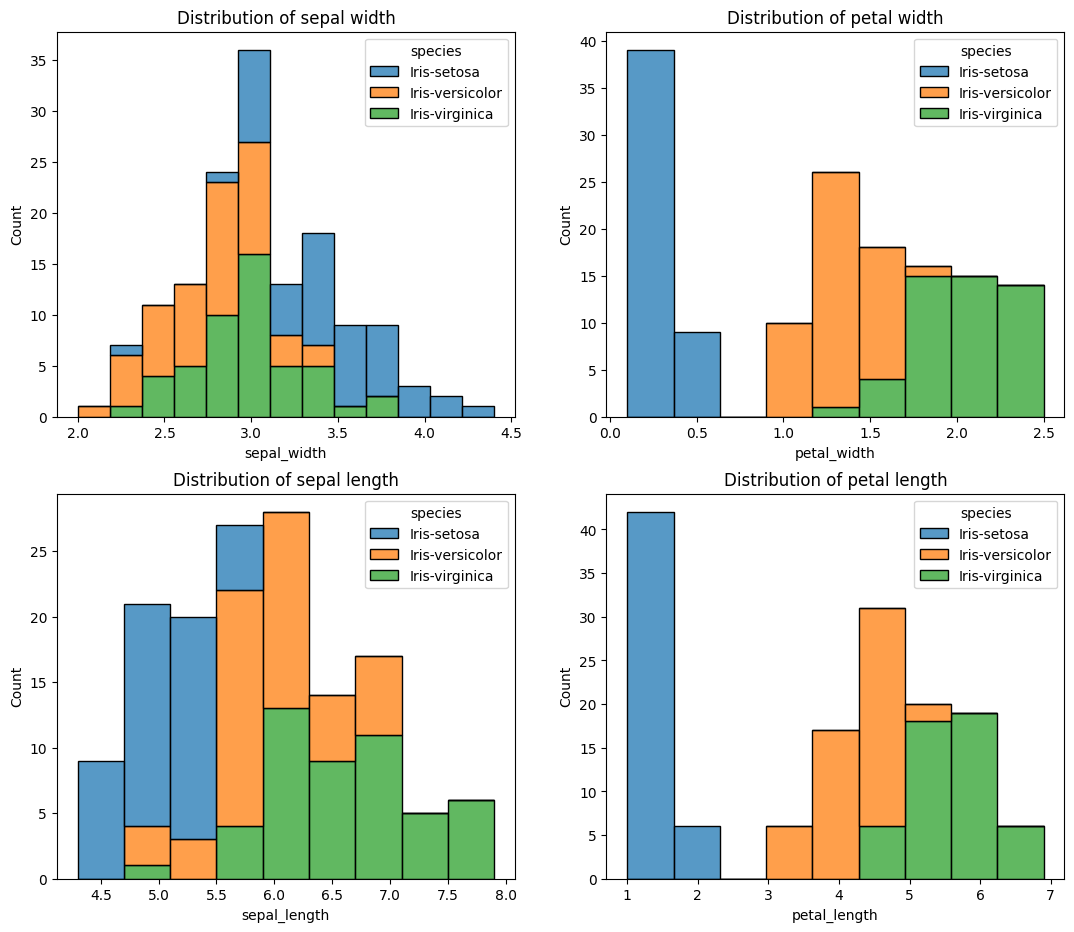

In [ ]:
fig, axes=plt.subplots(2,2, figsize=(13,11))
sns.histplot(data=df, x='sepal_width', hue='species', multiple="stack", ax=axes[0,0]).set(title='Distribution of sepal width')
sns.histplot(data=df, x='petal_width', hue='species', multiple="stack", ax=axes[0,1]).set(title='Distribution of petal width')
sns.histplot(data=df, x='sepal_length', hue='species', multiple="stack", ax=axes[1,0]).set(title='Distribution of sepal length')
sns.histplot(data=df, x='petal_length', hue='species', multiple="stack", ax=axes[1,1]).set(title='Distribution of petal length')

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
label_encoder=LabelEncoder()
df['species']=label_encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

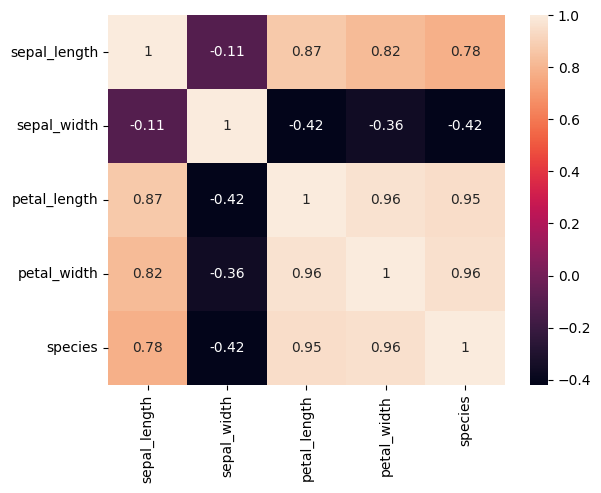

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.corr()['species'][:].sort_values(ascending=False)

species         1.000000
petal_width     0.955693
petal_length    0.948339
sepal_length    0.782904
sepal_width    -0.418348
Name: species, dtype: float64

In [ ]:
X=df.drop(['species'], axis=1)
y=df['species']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.2, random_state=13)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
models={'KNN':KNeighborsClassifier(), 'SVC':SVC(), 'Logistic Regression': LogisticRegression(),'Decision Tree': DecisionTreeClassifier()}
results=[]
for name, model in models.items():
  kFold = KFold(n_splits=5, random_state=13, shuffle=True)
  model_results=cross_val_score(model, X_train_scaled, y_train, cv=kFold, scoring='accuracy')
  results.append(model_results)
  print(f'{name} accuracy:{model_results.mean()}')


KNN accuracy:0.9572463768115942
SVC accuracy:0.9742753623188406
Logistic Regression accuracy:0.9655797101449277
Decision Tree accuracy:0.9568840579710146


In [ ]:
accuracy_scores={}
pred_results={}
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  model_result = model.predict(X_test_scaled)
  pred_results[name]=model_result
  score=accuracy_score(y_test, model_result)
  accuracy_scores[name]=score
  print(f'{name} accuracy:{score}')

KNN accuracy:0.8333333333333334
SVC accuracy:0.9
Logistic Regression accuracy:0.9
Decision Tree accuracy:0.9


<Axes: >

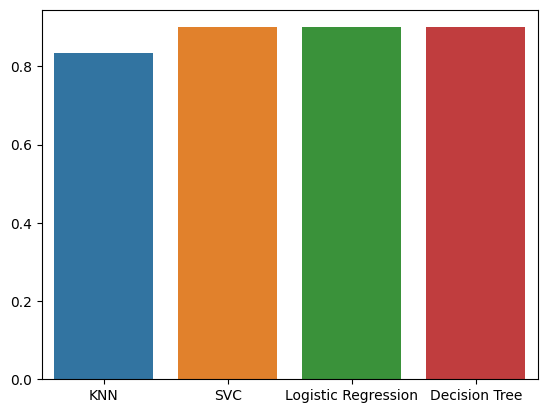

In [ ]:
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))

<Axes: >

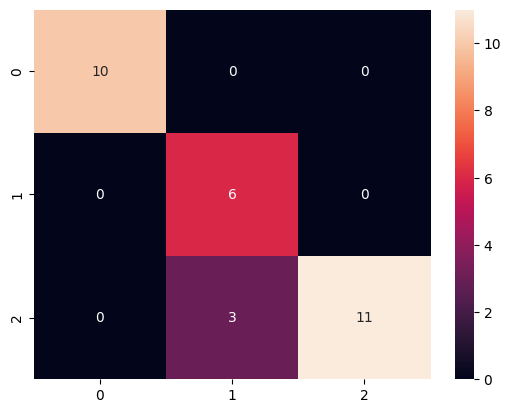

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, pred_results['SVC']), annot=True, fmt='.0f')

In [ ]:
print(classification_report(y_test, pred_results['SVC']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      1.00      0.80         6
           2       1.00      0.79      0.88        14

    accuracy                           0.90        30
   macro avg       0.89      0.93      0.89        30
weighted avg       0.93      0.90      0.90        30



#Hyperparameter Tuning

In [ ]:
params_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly']}
grid=GridSearchCV(SVC(), params_grid, refit = True, cv=5)
grid.fit(X_train_scaled, y_train)
print(f'Best Hyperparameters:{grid.best_params_}')

Best Hyperparameters:{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
best_model=grid.best_estimator_
y_pred2=best_model.predict(X_test_scaled)
print(f'Accuracy of improved SVM: {accuracy_score(y_test, y_pred2)}')

Accuracy of improved SVM: 0.9


<Axes: >

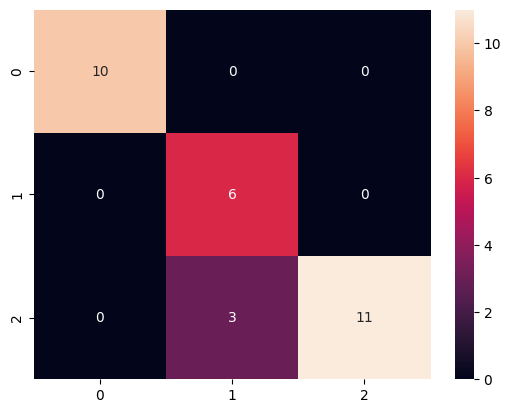

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, y_pred2), annot=True, fmt='.0f')